In [1]:
%pip install scikit-learn==1.3.0


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1535,spam,You have won a Nokia 7250i. This is what you g...,NaN,NaN,NaN
4943,ham,Wrong phone! This phone! I answer this one but...,NaN,NaN,NaN
860,ham,In work now. Going have in few min.,NaN,NaN,NaN
1475,ham,Nice. Wait...should you be texting right now? ...,NaN,NaN,NaN
1244,ham,Now? I'm going out 4 dinner soon..,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  7 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:


df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4813,ham,Ummmmmaah Many many happy returns of d day my ...
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
3359,ham,Please attend the phone:)
3633,ham,Its a big difference. &lt;#&gt; versus &lt;...
3952,spam,Refused a loan? Secured or Unsecured? Can't ge...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1639,spam,FreeMsg:Feelin kinda lnly hope u like 2 keep m...
4723,spam,FREE GAME. Get Rayman Golf 4 FREE from the O2 ...
1685,ham,Cramps stopped. Going back to sleep
1367,ham,"I don't know, same thing that's wrong everyso ..."
971,ham,"Haha awesome, omw back now then"


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.tail(5)

,target,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ï¿½_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

402

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5170, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     654
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x183eaf6c210>,
 [Text(-1.0142737821828087, 0.4257331262382342, 'ham'),
  Text(1.0142737423227925, -0.425733221201397, 'spam')],
 [Text(-0.5532402448269865, 0.23221806885721863, '87.350'),
  Text(0.5532402230851595, -0.23221812065530742, '12.650')])

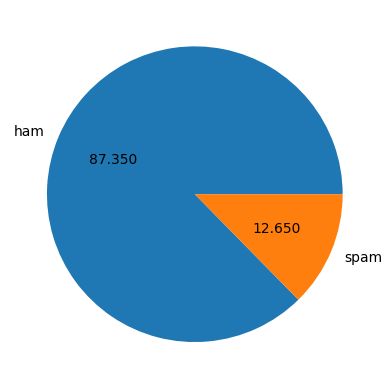

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.3f')

In [21]:
import nltk

In [22]:
%pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\MEDHA
[nltk_data]     TRUST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.tail()

,target,text,num_characters,num_words
5567,1,This is the 2nd time we have tried 2 contact u...,162,35
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27
5571,0,Rofl. Its true to its name,26,7


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.sample(6)

,target,text,num_characters,num_words,num_sentences
1834,0,I have a rather prominent bite mark on my righ...,53,11,1
579,0,Arngd marriage is while u r walkin unfortuntly...,140,32,1
2288,0,Dont you have message offer,27,5,1
2750,0,Ok but tell me half an hr b4 u come i need 2 p...,53,15,1
4504,1,Mobile Club: Choose any of the top quality ite...,73,15,2
1675,0,Painful words- \I thought being Happy was the ...,81,15,2


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5170.000000,5170.00000,5170.000000
mean,79.242747,18.45648,1.965377
std,58.338722,13.32356,1.448464
min,2.000000,1.00000,1.000000
25%,36.000000,9.00000,1.000000
50%,61.000000,15.00000,1.000000
75%,117.000000,26.00000,2.000000
max,910.000000,220.00000,38.000000


In [31]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,654.000000,654.000000,654.000000
mean,138.340979,27.659021,2.967890
std,30.238890,7.006556,1.489281
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

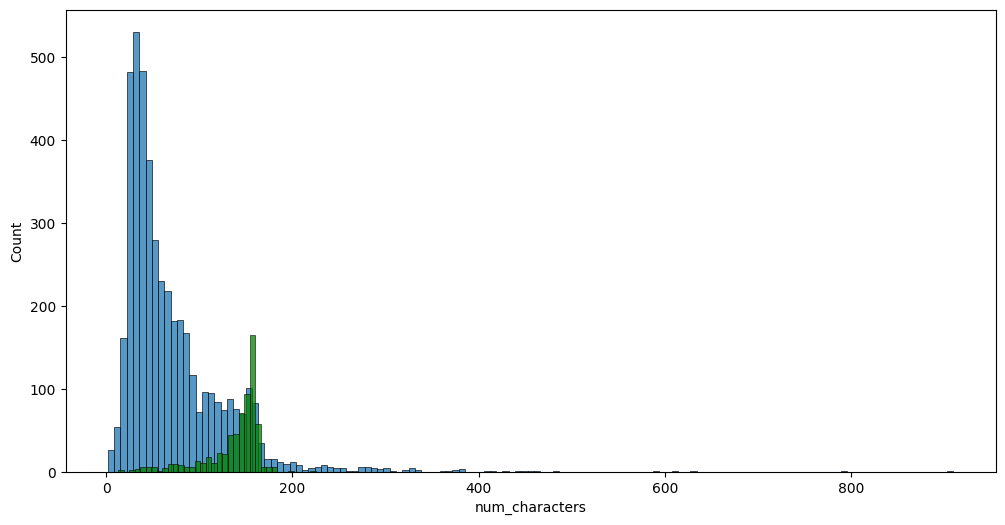

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='green')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

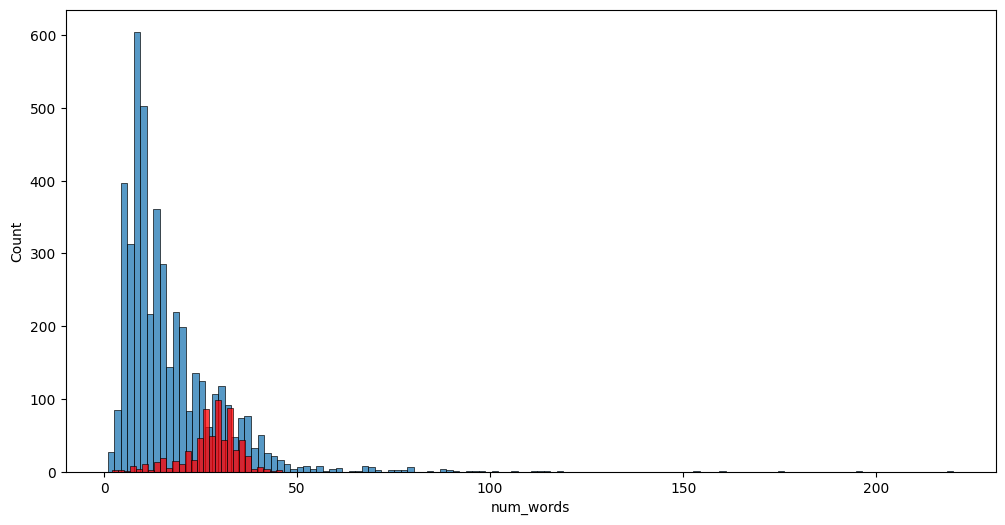

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

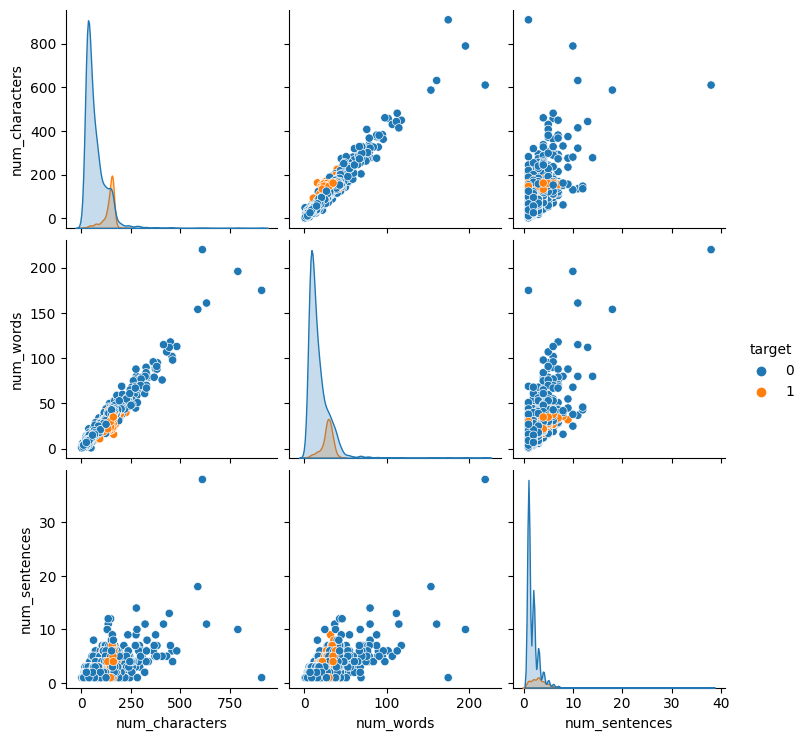

In [36]:
sns.pairplot(df,hue='target')

C:\Users\MEDHA TRUST\AppData\Local\Temp\ipykernel_3320\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

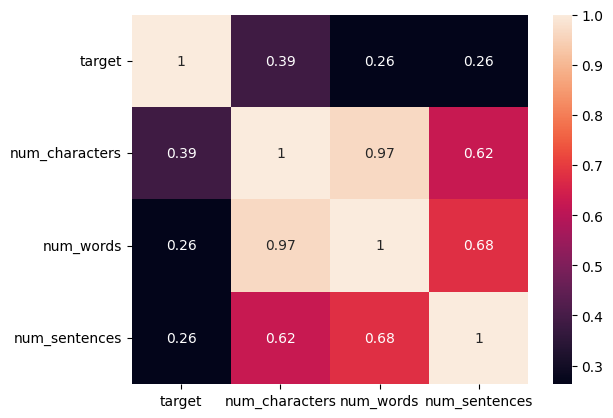

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
%pip install nltk

#import nltk.corpus.stopwords

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\MEDHA
[nltk_data]     TRUST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords

# Example usage
stop_words = set(stopwords.words('english'))
print(stop_words)

{'t', 'o', 'needn', 'was', 'do', 'his', 'own', 'the', 'weren', 'mightn', 'no', "isn't", 'during', "shan't", 'on', 'he', 'that', 'ma', "should've", "won't", 'same', 'are', 'theirs', 'don', 'where', 'wasn', 'themselves', 'yours', 'they', "weren't", 'i', 'there', 'both', 'of', 'other', 'which', 'this', 'between', 'or', 'then', "didn't", 'himself', 'nor', 'ain', 'didn', 'any', 'all', 'by', 'its', 'how', 'couldn', 'just', 'more', 'we', 'into', "you'd", 'be', 'against', 'below', 'll', "wasn't", 'when', "shouldn't", 'she', "you're", 'hadn', 'only', 'you', 'yourselves', 'your', "she's", "couldn't", 'it', 'myself', 'before', "hasn't", 'haven', 'not', 'hasn', "you've", 'doesn', "mustn't", 's', 'few', 'as', 'did', 'such', 'very', 've', 'shouldn', 'because', 'were', 'can', 'each', 'down', 'is', 'herself', 'am', 'having', 'over', 'so', 'isn', "you'll", 'their', "aren't", 'our', 'has', 'too', "mightn't", 'up', 'further', 'off', 'for', 'will', 'my', 'shan', 'y', 'ourselves', 'a', 'him', 'through', 'i

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
import string

In [44]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [49]:

len(spam_corpus)

9953

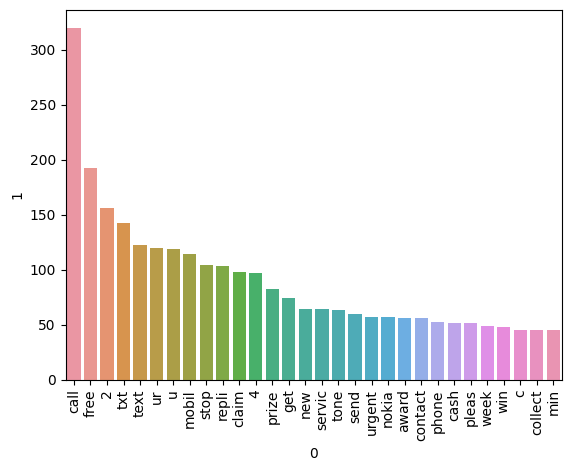

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:

len(ham_corpus)

35305

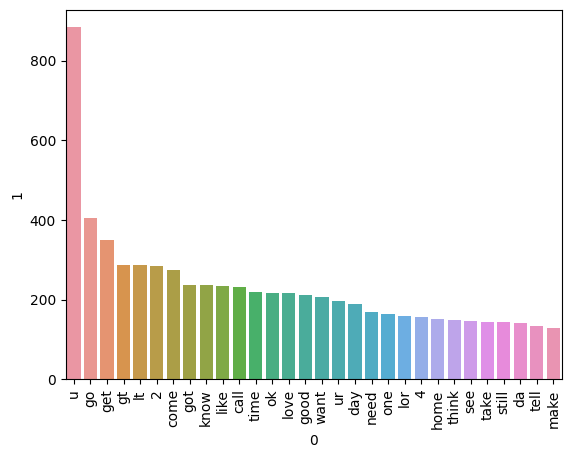

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:

X.shape

(5170, 3000)

In [58]:
y = df['target'].values

In [59]:

from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc,  
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.956140350877193
For  NB
Accuracy -  0.9690522243713733
Precision -  0.9902912621359223
For  DT
Accuracy -  0.9245647969052224
Precision -  0.8089887640449438
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.926605504587156
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9550561797752809
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9724770642201835


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)




In [67]:
performance_df

,Algorithm,Accuracy,Precision
3,RF,0.970019,1.000000
1,NB,0.969052,0.990291
6,xgb,0.970986,0.972477
0,SVC,0.971954,0.956140
5,GBDT,0.949710,0.955056
4,AdaBoost,0.961315,0.926606
2,DT,0.924565,0.808989


In [68]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
NB = MultinomialNB()
LR= LogisticRegression()

from sklearn.ensemble import VotingClassifier

In [69]:
voting = VotingClassifier(estimators=[('svm', svc),('rf',rfc),('nb',NB),('lr',LR)],voting='soft')

In [70]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [71]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9732142857142857


In [72]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
